In [1]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1.1 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


importing the modules

In [2]:
import pandas  as pd


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn .preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

from sklearn.model_selection import RandomizedSearchCV


reading the datasets

In [4]:
import pandas as pd
df = pd.read_csv("frappe.csv")

In [5]:
df.head()

,user\titem\tcnt\tdaytime\tweekday\tisweekend\thomework\tcost\tweather\tcountry\tcity
0,0\t0\t1\tmorning\tsunday\tweekend\tunknown\tfr...
1,1\t1\t7\tafternoon\tsaturday\tweekend\tunknown...
2,2\t2\t6\tevening\tmonday\tworkday\tunknown\tfr...
3,3\t3\t1\tsunset\tthursday\tworkday\tunknown\tf...
4,4\t4\t428\tnight\tthursday\tworkday\thome\tfre...


extraction for every column.

In [6]:
df = df['user\titem\tcnt\tdaytime\tweekday\tisweekend\thomework\tcost\tweather\tcountry\tcity'].str.split('\t', expand=True)

In [7]:
df = df.rename(columns={0:'user', 1:'item', 2:'cnt', 3:'daytime', 4:'weekday', 5:'isweekend', 6:'homework', 7:'cost', 8:'weather', 9:'country', 10:'city'})

In [8]:
df.columns

Index(['user', 'item', 'cnt', 'daytime', 'weekday', 'isweekend', 'homework',
       'cost', 'weather', 'country', 'city'],
      dtype='object')

In [9]:
df.head()

,user,item,cnt,daytime,weekday,isweekend,homework,cost,weather,country,city
0,0,0,1,morning,sunday,weekend,unknown,free,sunny,United States,0
1,1,1,7,afternoon,saturday,weekend,unknown,free,cloudy,Spain,0
2,2,2,6,evening,monday,workday,unknown,free,cloudy,Spain,369
3,3,3,1,sunset,thursday,workday,unknown,free,unknown,United States,1028
4,4,4,428,night,thursday,workday,home,free,sunny,Switzerland,147


In [10]:
df['daytime'].unique()

array(['morning', 'afternoon', 'evening', 'sunset', 'night', 'noon',
       'sunrise'], dtype=object)

In [11]:
df['weekday'].unique()

array(['sunday', 'saturday', 'monday', 'thursday', 'wednesday', 'tuesday',
       'friday'], dtype=object)

In [12]:
df['weather'].unique()

array(['sunny', 'cloudy', 'unknown', 'foggy', 'rainy', 'stormy',
       'drizzle', 'snowy', 'sleet'], dtype=object)

In [13]:
df[['user','item','cnt','daytime','weekday','isweekend','homework','cost','weather','country','city']]

,user,item,cnt,daytime,weekday,isweekend,homework,cost,weather,country,city
0,0,0,1,morning,sunday,weekend,unknown,free,sunny,United States,0
1,1,1,7,afternoon,saturday,weekend,unknown,free,cloudy,Spain,0
2,2,2,6,evening,monday,workday,unknown,free,cloudy,Spain,369
3,3,3,1,sunset,thursday,workday,unknown,free,unknown,United States,1028
4,4,4,428,night,thursday,workday,home,free,sunny,Switzerland,147
...,...,...,...,...,...,...,...,...,...,...,...
96198,110,0,5,evening,sunday,weekend,unknown,free,sunny,United States,0
96199,37,16,101,sunset,sunday,weekend,unknown,free,cloudy,Canada,128
96200,181,33,243,afternoon,sunday,weekend,unknown,free,cloudy,Israel,454
96201,451,752,1,evening,sunday,weekend,unknown,free,sunny,United States,0


meta dataset

In [14]:
meta_app=pd.read_csv("meta.csv",sep='\t')

In [15]:
meta_app.head()

,item,package,category,downloads,developer,icon,language,description,name,price,rating,short desc
0,0,com.anydo,Productivity,"1,000,000 - 5,000,000",Any.DO,http://d2lh3rxs7crswz.cloudfront.net/com.anydo...,en,"Meet Any.DO, the best way to-do To-do's on And...",Any.DO To-do & Tasks List,Free,4.5,Any.DO helps you remember everything you have ...
1,1,com.yahoo.mobile.client.android.yahoo,News & Magazines,"1,000,000 - 5,000,000",Yahoo! Inc.,http://d2lh3rxs7crswz.cloudfront.net/com.yahoo...,en,"With Yahoo! for Android, you’ll stay connected...",Yahoo!,Free,4.2,"With Yahoo! for Android, you’ll stay connected..."
2,2,com.compasspro,Tools,"1,000,000 - 5,000,000",Mobile Essentials,http://d2lh3rxs7crswz.cloudfront.net/com.compa...,en,Professional Compass for Android. Simple and p...,Compass PRO,Free,4.1,Professional Compass for Android. Simple and p...
3,3,com.instagram.android,Social,"50,000,000 - 100,000,000",Instagram,http://d2lh3rxs7crswz.cloudfront.net/com.insta...,en,Instagram – A beautiful way to share your worl...,Instagram,Free,4.6,Instagram – A beautiful way to share your worl...
4,4,com.shoppinglist,Shopping,"10,000 - 50,000",Kiwi3,http://d2lh3rxs7crswz.cloudfront.net/com.shopp...,en,Shopping List is the most easy way to organize...,Shopping List,Free,4.5,"The most easy Shopping List. In English, for f..."


In [16]:
meta_app=meta_app[['name','item']]

In [17]:

meta_app['item'] = meta_app['item'].astype('category')


In [18]:
df = df.merge(meta_app, on='item')

In [19]:
df['user'] = df['user'].astype('int64')
df['item'] = df['item'].astype('int64')
df['cnt'] = df['cnt'].astype('int64')
df['city']=df['city'].astype('int64')
df['daytime']=df['daytime'].astype('int32')
df['weekday']=df['weekday'].astype('int32')
df['isweekend']=df['isweekend'].astype('int32')
df['homework']=df['homework'].astype('int32')
df['cost']=df['cost'].astype('int32')
df['weather']=df['weather'].astype('int32')
df['name']=df['name'].astype('int32')
df['country']=df['country'].astype(object)

In [20]:
df.shape

(0, 12)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 0 entries
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   user       0 non-null      int64 
 1   item       0 non-null      int64 
 2   cnt        0 non-null      int64 
 3   daytime    0 non-null      int32 
 4   weekday    0 non-null      int32 
 5   isweekend  0 non-null      int32 
 6   homework   0 non-null      int32 
 7   cost       0 non-null      int32 
 8   weather    0 non-null      int32 
 9   country    0 non-null      object
 10  city       0 non-null      int64 
 11  name       0 non-null      int32 
dtypes: int32(7), int64(4), object(1)
memory usage: 132.0+ bytes


duplicate ,Categorical values,null values

In [22]:
df.duplicated().sum()

np.int64(0)

In [23]:
df.isna().sum()

user         0
item         0
cnt          0
daytime      0
weekday      0
isweekend    0
homework     0
cost         0
weather      0
country      0
city         0
name         0
dtype: int64

In [24]:
from sklearn.preprocessing import LabelEncoder
dt_encoder=LabelEncoder()
dt_encoder.fit(df['daytime'])
df['daytime']=dt_encoder.transform (df['daytime'])
wd_encoder=LabelEncoder()
wd_encoder.fit(df['weekday'])
df['weekday']=wd_encoder.transform(df['weekday'])
wknd_encoder=LabelEncoder()
wknd_encoder.fit(df['isweekend'])
df['isweekend']=wknd_encoder.transform(df['isweekend'])
hw_encoder=LabelEncoder()
hw_encoder.fit(df['homework'])
df_homework=hw_encoder.transform(df['homework'])
c_encoder=LabelEncoder()
c_encoder.fit(df['cost'])
df['cost']=c_encoder.transform(df['cost'])
w_encoder=LabelEncoder()
w_encoder.fit(df['weather'])
df['weather']=w_encoder.transform(df['weather'])
n_encoder=LabelEncoder()


visual analysis

C:\Users\mandh\AppData\Local\Temp\ipykernel_2700\4124528181.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['cnt'],ax=axes[0,0])


<Axes: xlabel='weather', ylabel='count'>

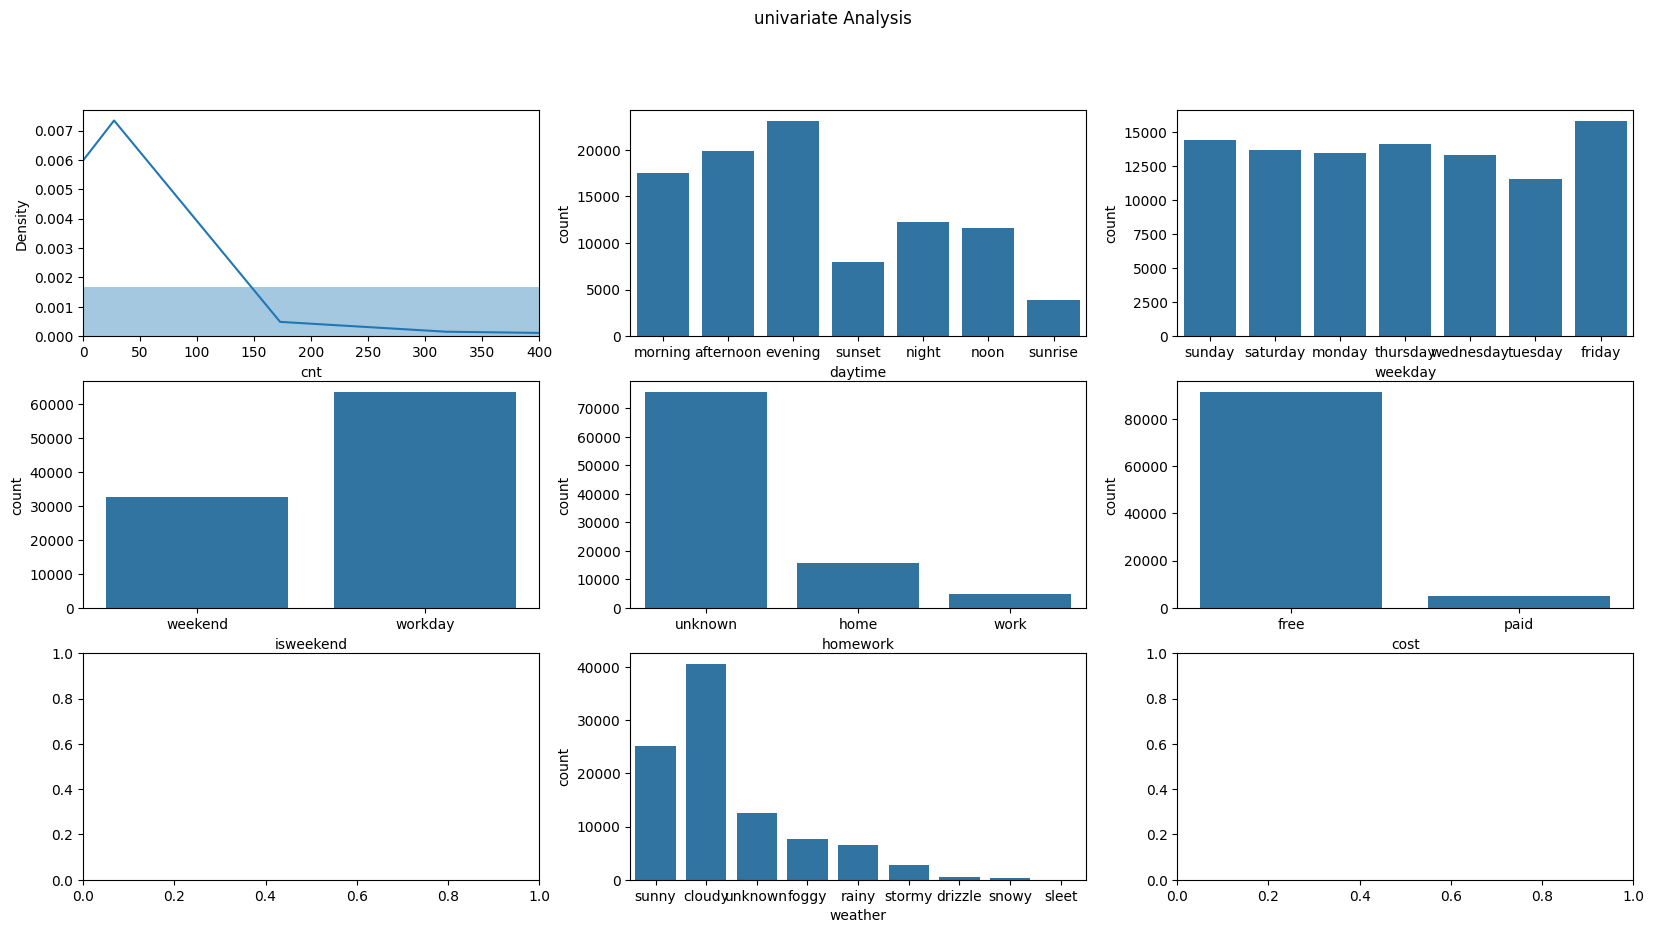

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv("frappe.csv")
df = df['user\titem\tcnt\tdaytime\tweekday\tisweekend\thomework\tcost\tweather\tcountry\tcity'].str.split('\t', expand=True)
df.columns = ['user', 'item', 'cnt', 'daytime', 'weekday', 'isweekend', 'homework', 'cost', 'weather', 'country', 'city']
fig,axes=plt.subplots(3,3,figsize=(20,10))
fig.suptitle("univariate Analysis")
sns.distplot(df['cnt'],ax=axes[0,0])
axes[0,0].set_xlim(0,400)
sns.countplot(x=df['daytime'],ax=axes[0,1])
#df = df['user\titem\tcnt\tdaytime\tweekday\tisweekend\thomework\tcost\tweather\tcountry\tcity'].str.split('\t', expand=True)
#df.columns = ['user', 'item', 'cnt', 'daytime', 'weekday', 'isweekend', 'homework', 'cost', 'weather', 'country', 'city']
sns.countplot(x=df['weekday'],ax=axes[0,2])
sns.countplot(x=df['isweekend'],ax=axes[1,0])
sns.countplot(x=df['homework'],ax=axes[1,1])
sns.countplot(x=df['cost'],ax=axes[1,2])
sns.countplot(x=df['weather'],ax=axes[2,1])

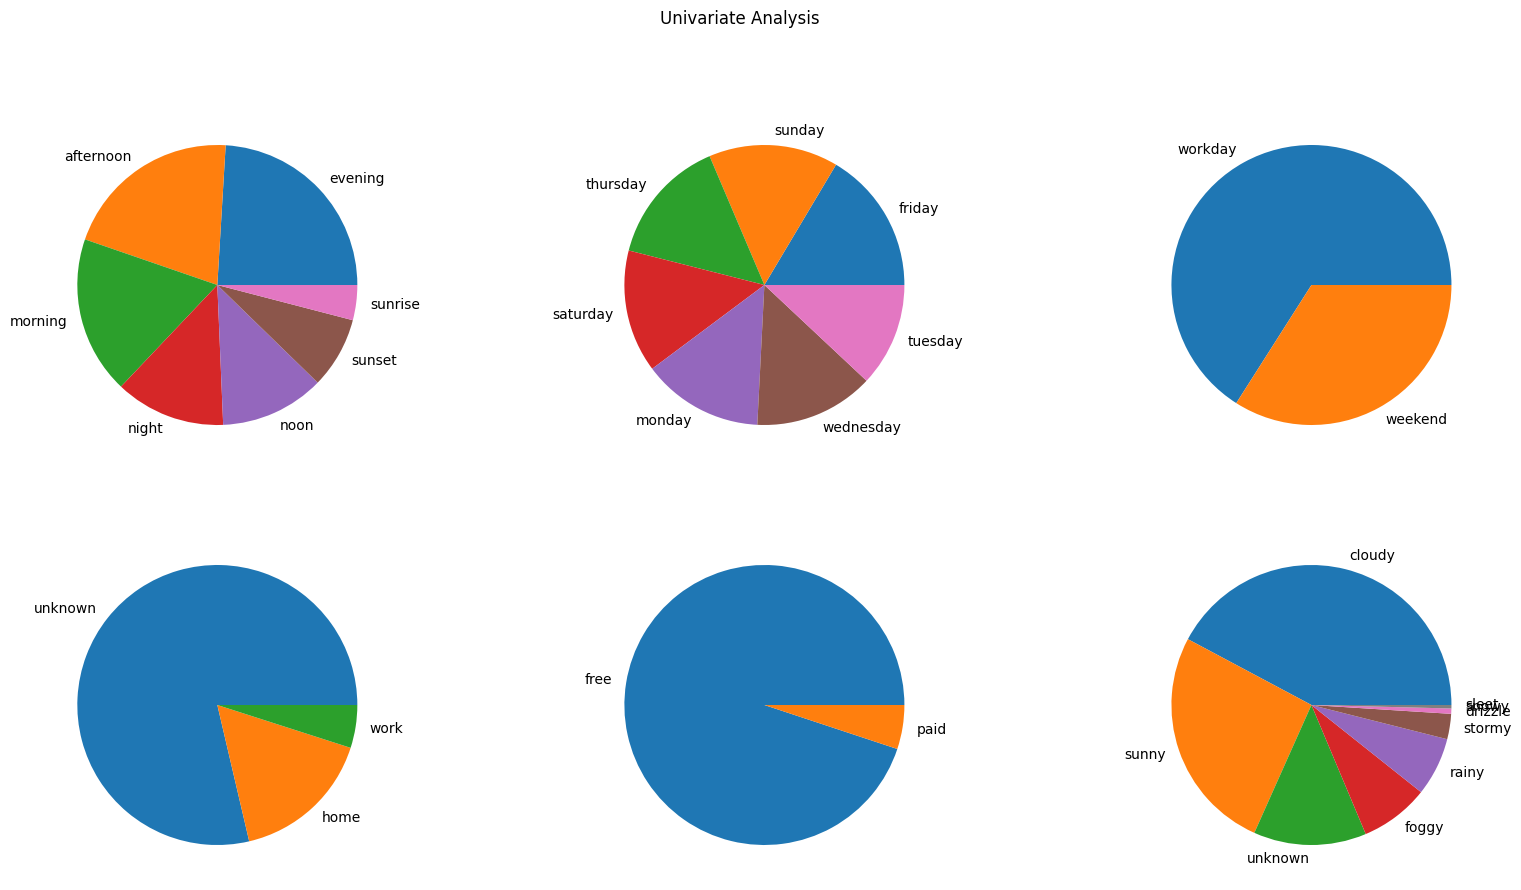

In [26]:
fig,axes=plt.subplots(2,3,figsize=(20,10))
fig.suptitle("Univariate Analysis")
col=['daytime','weekday','isweekend','homework','cost','weather']
k=0
for i in range(2):
  for j in range(3):
    d=dict(df[col[k]].value_counts())
    axes[i,j].pie(d.values(),labels=d.keys())
    k+=1


<Axes: xlabel='weather', ylabel='count'>

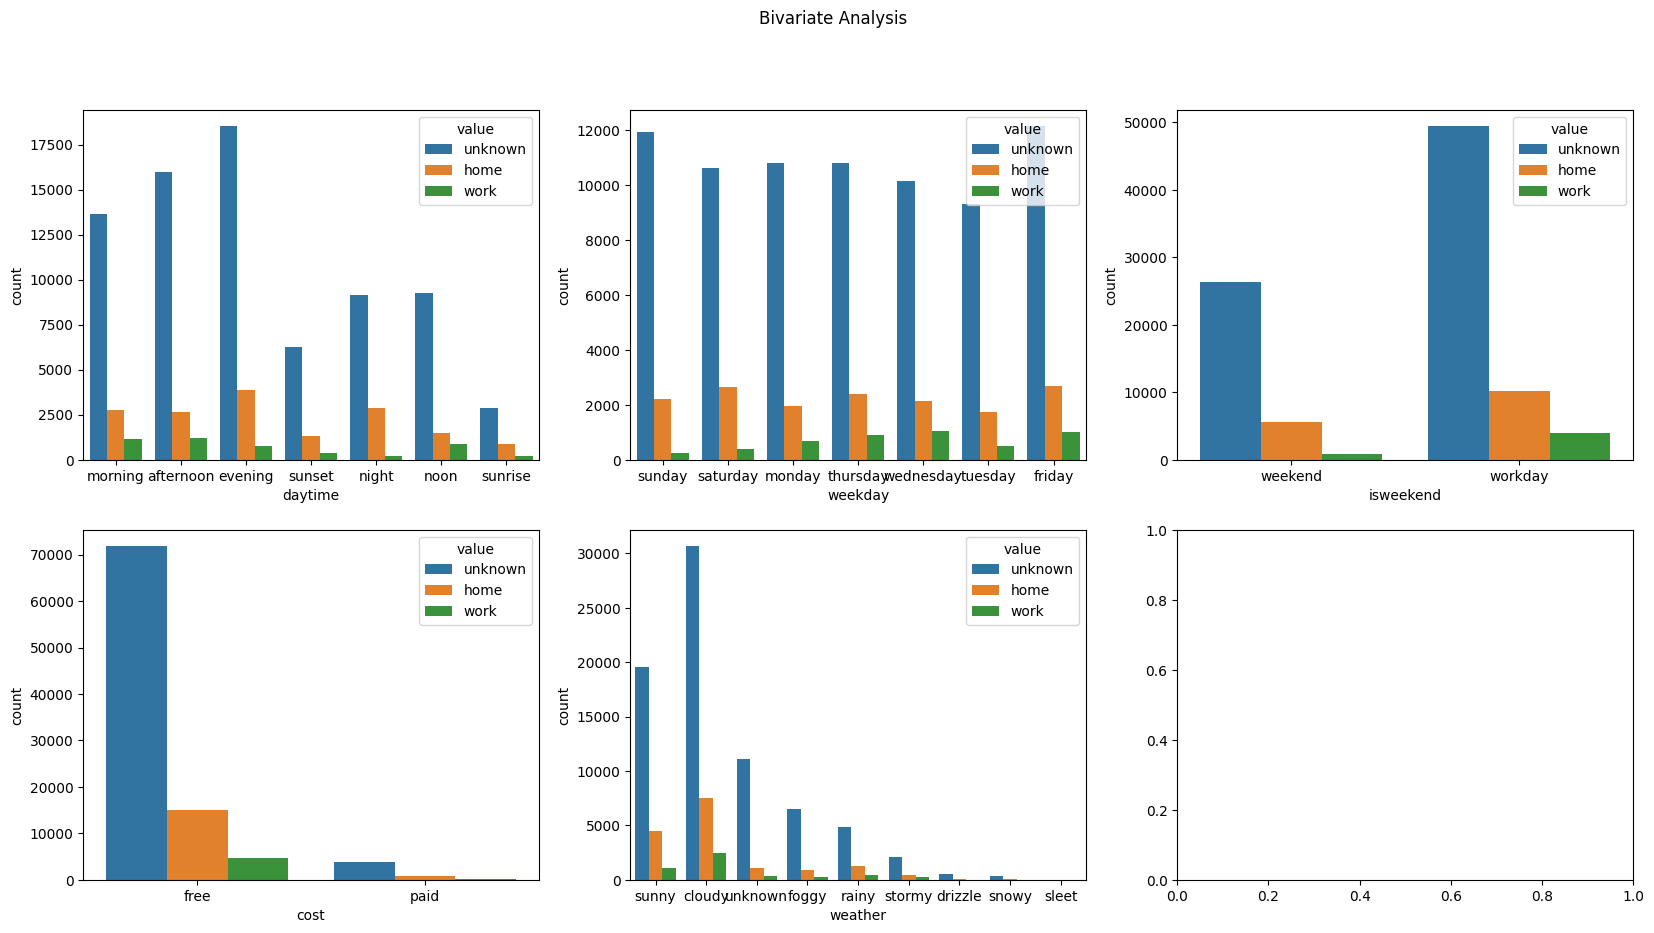

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

fig,axes=plt.subplots(2,3,figsize=(20,10))
fig.suptitle("Bivariate Analysis")

# Melt the dataframe to long-form
df_melted = pd.melt(df, id_vars=['daytime', 'weekday', 'isweekend','cost','weather'], value_vars=['homework'])

# Use the melted dataframe in the countplots
sns.countplot(x='daytime', hue='value', data=df_melted, ax=axes[0,0])
sns.countplot(x='weekday', hue='value', data=df_melted, ax=axes[0,1])
sns.countplot(x='isweekend', hue='value', data=df_melted, ax=axes[0,2])
sns.countplot(x='cost' , hue='value', data=df_melted, ax=axes[1,0])
sns.countplot(x='weather', hue='value',data=df_melted,ax=axes[1,1])


In [28]:
cols=['item','cnt','daytime','weekday','isweekend','cost','weather','country','city','homework']

In [29]:
import pandas as pd
df = pd.read_csv("frappe.csv")
df = df['user\titem\tcnt\tdaytime\tweekday\tisweekend\thomework\tcost\tweather\tcountry\tcity'].str.split('\t', expand=True)
df.columns = ['user', 'item', 'cnt', 'daytime', 'weekday', 'isweekend', 'homework', 'cost', 'weather', 'country', 'city']

# Fix the data types
df['user'] = df['user'].astype('int64')
df['item'] = df['item'].astype('int64')
df['cnt'] = df['cnt'].astype('int64')
df['city'] = df['city'].astype('int64')
df['daytime'] = df['daytime'].astype('str')
df['weekday'] = df['weekday'].astype('str')
df['isweekend'] = df['isweekend'].astype('str')
df['homework'] = df['homework'].astype('str')
df['cost'] = df['cost'].astype('str')
df['weather'] = df['weather'].astype('str')
#df['name'] = df['name'].astype('str')
df['country'] = df['country'].astype(object)

categorial values

In [30]:
# Assuming 'df' is your DataFrame
# ... (your existing code to load and preprocess the DataFrame)

# Convert relevant columns to numeric representations
df['daytime'] = df['daytime'].astype('category').cat.codes
df['weekday'] = df['weekday'].astype('category').cat.codes
df['isweekend'] = df['isweekend'].astype('category').cat.codes
df['homework'] = df['homework'].astype('category').cat.codes
df['cost'] = df['cost'].astype('category').cat.codes
df['weather'] = df['weather'].astype('category').cat.codes

# Remove 'country' from the list of columns for correlation
cols = ['item', 'cnt', 'daytime', 'weekday', 'isweekend', 'cost', 'weather', 'city', 'homework']

# Now calculate the correlation matrix
c = df[cols].corr()
print(c)


               item       cnt   daytime   weekday  isweekend      cost  \
item       1.000000 -0.033081 -0.022849 -0.006549  -0.013251  0.076137   
cnt       -0.033081  1.000000 -0.026413  0.011359   0.003327  0.012877   
daytime   -0.022849 -0.026413  1.000000  0.001145   0.001823  0.000361   
weekday   -0.006549  0.011359  0.001145  1.000000   0.262209  0.005102   
isweekend -0.013251  0.003327  0.001823  0.262209   1.000000 -0.002499   
cost       0.076137  0.012877  0.000361  0.005102  -0.002499  1.000000   
weather    0.020683 -0.017030 -0.016308 -0.008757  -0.007728 -0.011451   
city      -0.042365  0.038171 -0.024729 -0.030741  -0.005812  0.003598   
homework  -0.005557 -0.001074 -0.022753  0.016317   0.051991 -0.008662   

            weather      city  homework  
item       0.020683 -0.042365 -0.005557  
cnt       -0.017030  0.038171 -0.001074  
daytime   -0.016308 -0.024729 -0.022753  
weekday   -0.008757 -0.030741  0.016317  
isweekend -0.007728 -0.005812  0.051991  
cost   

<Axes: >

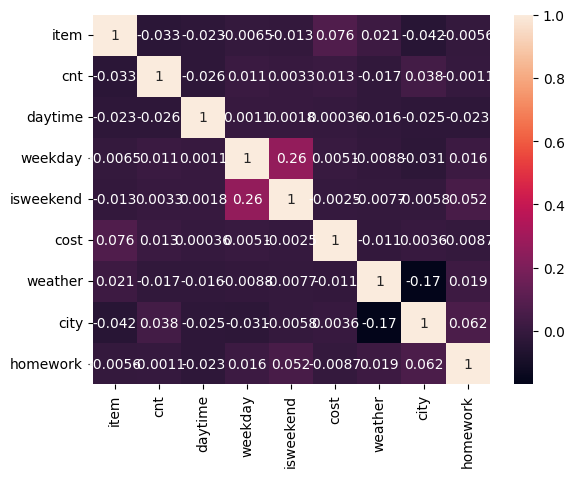

In [31]:
sns.heatmap(c,annot=True)

feature selection

In [32]:
features=['item','daytime','weekday','isweekend','cost','weather','city']
x=df[features]
y=df[['homework']]

In [33]:
y.head(5)

,homework
0,1
1,1
2,1
3,1
4,0


In [34]:
 pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1.1 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [35]:
import imblearn

In [36]:
from imblearn.over_sampling import SMOTE

In [37]:
df['homework'].value_counts()

homework
1    75670
0    15771
2     4762
Name: count, dtype: int64

In [38]:
from imblearn.over_sampling import SMOTE
smote_sampler = SMOTE(random_state=42)
X_smote, y_smote = smote_sampler.fit_resample(x, y)
smote_data = pd.concat([X_smote, y_smote], axis=1)
smote_data.shape

(227010, 8)

In [39]:
smote_data['homework'].value_counts()

homework
1    75670
0    75670
2    75670
Name: count, dtype: int64

In [40]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X_smote,y_smote,train_size=0.8,random_state=42)

In [41]:
x_test.shape

(45402, 7)

In [42]:
y_test.shape

(45402, 1)

scaling the data  

In [43]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() # Use the correct class name with capitalization
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

multiple algorithms

In [44]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier



In [45]:
models=[]
models.append(('KNeighborsClassifier',KNeighborsClassifier()))
models.append((' DecisionTreeClassifier', DecisionTreeClassifier()))
models.append(('RandomForestClassifier',RandomForestClassifier()))
models.append(('XGBClassifier',XGBClassifier()))
models.append(('BaggingClassifier',BaggingClassifier()))
models.append(('AdaBoostClassifier',AdaBoostClassifier()))


In [46]:
model_perform={}

In [47]:
for   name ,model in models:
 from sklearn.metrics import precision_score
 from sklearn.metrics import recall_score
 from sklearn.metrics import accuracy_score
 from sklearn.metrics import f1_score
#AdaBoostClassifier
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
p=precision_score(y_test,y_pred,average='micro')
r=recall_score(y_test,y_pred,average='micro')
a=accuracy_score(y_test,y_pred)
f=f1_score(y_test,y_pred,average='micro')
s={'precision':p,'Recall':r,'Accuracy':a,'F1 Score':f}
model_perform[name]=s

c:\Users\mandh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\mandh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [48]:
for model in model_perform:
  print(model)
  print("precision:",model_perform[model]['precision'])
print("Recall:",model_perform[model]["Recall"])
print("Accuracy:",model_perform[model]["Accuracy"])
print("F1 Score:",model_perform[model]["F1 Score"])

AdaBoostClassifier
precision: 0.5588079820272235
Recall: 0.5588079820272235
Accuracy: 0.5588079820272235
F1 Score: 0.5588079820272235


In [49]:
param_grid={
    'criterion':['gini','entropy'],
    'splitter':['best','random'],
    'max_depth':[None,2,4,6,8,10],
    'min_samples_split':[2,5,10],
    'min_samples_leaf':[1,2,4],
    'max_features':[None,'sqrt','log2'],
    'min_impurity_decrease':[0.0,0.1,0.2],
    'ccp_alpha':[0.0,0.1,0.2]
    }

In [50]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

# Create a decision tree classifier object
dt_classifier = DecisionTreeClassifier()

random_search = RandomizedSearchCV(estimator=dt_classifier,
                                   param_distributions=param_grid,
                                   scoring='accuracy',
                                   cv=3,
                                   n_iter=100,
                                   random_state=42)

In [51]:
random_search.fit(x_train,y_train)
print("Best Parameters:",random_search.best_params_)
print("Best Score:",random_search.best_score_)

Best Parameters: {'splitter': 'best', 'min_samples_split': 2, 'min_samples_leaf': 2, 'min_impurity_decrease': 0.0, 'max_features': None, 'max_depth': None, 'criterion': 'entropy', 'ccp_alpha': 0.0}
Best Score: 0.7998105810316726


In [52]:
print("Best Score:",random_search.score(x_test,y_test))

Best Score: 0.8200299546275495


hyperparameter tunning

In [53]:
dt_final=random_search

In [54]:
from sklearn.metrics import classification_report 

print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.5028    0.5385    0.5201     15228
           1     0.5848    0.5074    0.5434     15011
           2     0.5945    0.6300    0.6118     15163

    accuracy                         0.5588     45402
   macro avg     0.5607    0.5587    0.5584     45402
weighted avg     0.5606    0.5588    0.5584     45402



0.8200299546275495


<Axes: >

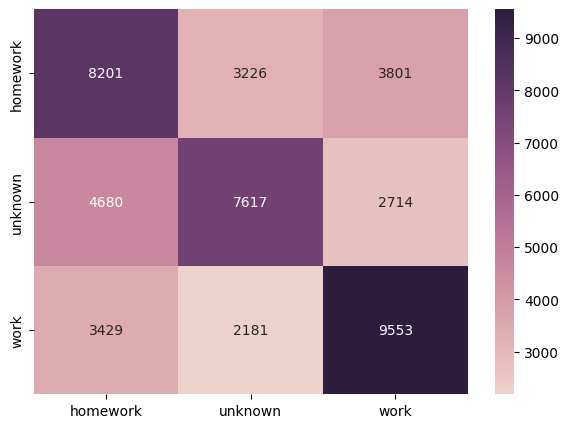

In [55]:
from sklearn.metrics import classification_report, confusion_matrix # Import both functions

y_pres=dt_final.predict(x_test)
print(dt_final.score(x_test, y_test))
cm = confusion_matrix(y_test, y_pred, labels=[0, 1, 2])
df_cm = pd.DataFrame(cm, index=[i for i in ["homework", "unknown", "work"]],
                   columns=[i for i in ["homework", "unknown", "work"]])

plt.figure(figsize=(7, 5))
sns.heatmap(df_cm,annot=True,fmt='g',cmap=sns.cubehelix_palette(as_cmap=True))

In [56]:
base_estimator=DecisionTreeClassifier()

In [57]:
param_grid={
    'n_estimators':[10,50,100],
    'max_samples':[0.5,0.7,1.0],
    'max_features':[0.5,0.7,1.0],
    'bootstrap':[True,False],
    'bootstrap_features':[True,False]
    }

In [58]:
random_search = RandomizedSearchCV(estimator=BaggingClassifier,
                                 param_distributions=param_grid,
                                 scoring='accuracy',
                                 cv=2,
                                 random_state=42)

In [59]:
dt_classifier = DecisionTreeClassifier()

# Define the parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 2, 4, 6, 8, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2'],
    'min_impurity_decrease': [0.0, 0.1, 0.2],
    'ccp_alpha': [0.0, 0.1, 0.2]
}

# Create the RandomizedSearchCV object with 3 folds for cross-validation
random_search = RandomizedSearchCV(estimator=dt_classifier,
                                 param_distributions=param_grid,
                                 scoring='accuracy',
                                 cv=3,  # Specify the number of folds here
                                 random_state=42)

# Fit the RandomizedSearchCV object with your training data
random_search.fit(x_train, y_train)


RandomizedSearchCV(cv=3, estimator=DecisionTreeClassifier(),
                   param_distributions={'ccp_alpha': [0.0, 0.1, 0.2],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [None, 2, 4, 6, 8, 10],
                                        'max_features': [None, 'sqrt', 'log2'],
                                        'min_impurity_decrease': [0.0, 0.1,
                                                                  0.2],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'splitter': ['best', 'random']},
                   random_state=42, scoring='accuracy')

In [60]:
print("Best Parameters:",random_search.best_params_)
print("Best Score:",random_search.best_score_)

Best Parameters: {'splitter': 'best', 'min_samples_split': 5, 'min_samples_leaf': 4, 'min_impurity_decrease': 0.2, 'max_features': None, 'max_depth': 10, 'criterion': 'gini', 'ccp_alpha': 0.0}
Best Score: 0.33401061627241085


In [61]:
print("Best Score:",random_search.score(x_test,y_test))

Best Score: 0.33062420157702305


In [62]:
bc_final=random_search

In [63]:
print(classification_report(y_test,y_pred,digits=4))

              precision    recall  f1-score   support

           0     0.5028    0.5385    0.5201     15228
           1     0.5848    0.5074    0.5434     15011
           2     0.5945    0.6300    0.6118     15163

    accuracy                         0.5588     45402
   macro avg     0.5607    0.5587    0.5584     45402
weighted avg     0.5606    0.5588    0.5584     45402



0.8200299546275495
Confusion Matrix:
[[8201 3226 3801]
 [4680 7617 2714]
 [3429 2181 9553]]


<Axes: >

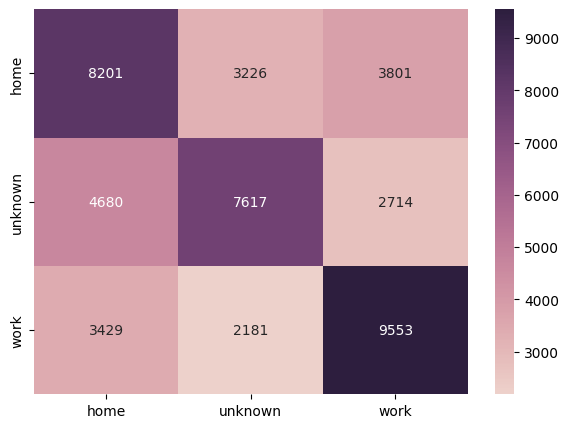

In [64]:
from sklearn.metrics import classification_report, confusion_matrix # Import both functions

y_pres=dt_final.predict(x_test)
print(dt_final.score(x_test, y_test))
cm = confusion_matrix(y_test, y_pred, labels=[0, 1, 2])
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)
df_cm = pd.DataFrame(cm, index=[i for i in ["home", "unknown", "work"]],
                   columns=[i for i in ["home", "unknown", "work"]])
plt.figure(figsize=(7, 5))
sns.heatmap(df_cm,annot=True,fmt='g',cmap=sns.cubehelix_palette(as_cmap=True))


In [65]:
from sklearn.ensemble import RandomForestClassifier

rf_final = RandomForestClassifier()

In [66]:
rf_final.fit(x_train,y_train)

c:\Users\mandh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier()

In [67]:
print("Best Score:",rf_final.score(x_test,y_test))

Best Score: 0.8220342716179904


In [68]:
print(classification_report(y_test,y_pred,digits=4))

              precision    recall  f1-score   support

           0     0.5028    0.5385    0.5201     15228
           1     0.5848    0.5074    0.5434     15011
           2     0.5945    0.6300    0.6118     15163

    accuracy                         0.5588     45402
   macro avg     0.5607    0.5587    0.5584     45402
weighted avg     0.5606    0.5588    0.5584     45402



0.8200299546275495


<Axes: >

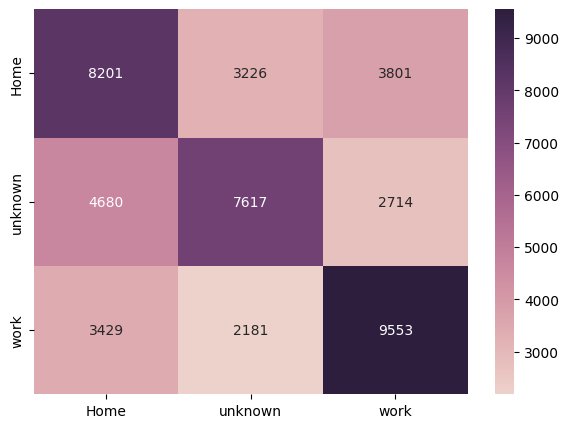

In [69]:
#from sklearn.metrics import classification_report, confusion_matrix # Import both functions

y_pres=dt_final.predict(x_test)
print(dt_final.score(x_test, y_test))
cm = confusion_matrix(y_test, y_pred, labels=[0, 1, 2])
df_cm = pd.DataFrame(cm, index=[i for i in ["Home", "unknown", "work"]],
                   columns=[i for i in ["Home", "unknown", "work"]])
plt.figure(figsize=(7, 5))
sns.heatmap(df_cm,annot=True,fmt='g',cmap=sns.cubehelix_palette(as_cmap=True))

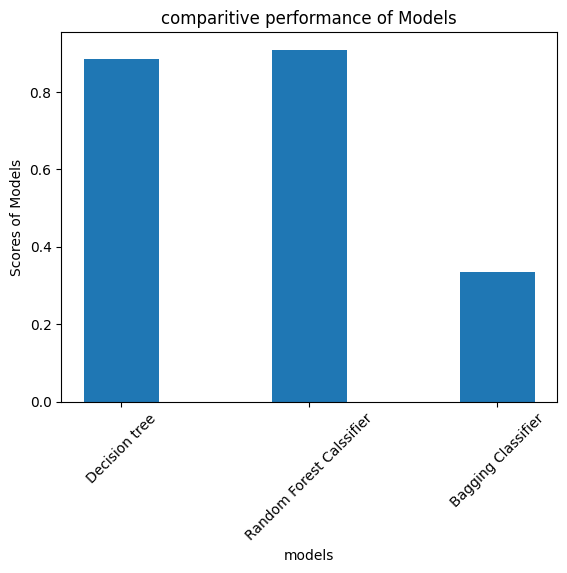

In [70]:

train_score={'Decision tree':dt_final.score(x_train,y_train),'Random Forest Calssifier':rf_final.score(x_train,y_train),'Bagging Classifier':bc_final.best_score_} # Access the best score using .best_score_ attribute
models=list(train_score.keys())
scores=list(train_score.values())
plt.bar(models,scores,
    width=0.4)

plt.xlabel("models")
plt.ylabel("Scores of Models")
plt.xticks(rotation=45)
plt.title("comparitive performance of Models")
plt.show()


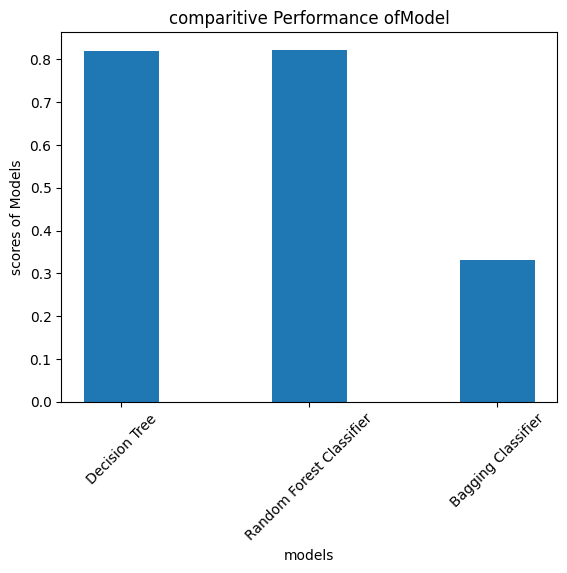

In [71]:
test_score={'Decision Tree':dt_final.score(x_test,y_test),'Random Forest Classifier':rf_final.score(x_test,y_test),'Bagging Classifier':bc_final.score(x_test, y_test)}
models=list(test_score.keys())
scores=list(test_score.values())

plt.bar(models,scores,
        width=0.4)

plt.xlabel("models")
plt.ylabel("scores of Models")
plt.xticks(rotation=45)
plt.title("comparitive Performance ofModel")
plt.show()

In [72]:
print(train_score)
print(test_score)

{'Decision tree': 0.8862109598696093, 'Random Forest Calssifier': 0.9086108541473944, 'Bagging Classifier': np.float64(0.33401061627241085)}
{'Decision Tree': 0.8200299546275495, 'Random Forest Classifier': 0.8220342716179904, 'Bagging Classifier': 0.33062420157702305}


In [73]:
import pickle

In [74]:

from sklearn.tree import DecisionTreeClassifier 


pickle.dump(bc_final,open("model.pkl","wb"))

In [75]:
pickle.dump(scaler,open('scaler.pkl',"wb"))

In [76]:
from sklearn.preprocessing import LabelEncoder
import joblib

import joblib
joblib.dump(dt_encoder,"DayTimeEncoder")
joblib.dump(wd_encoder,"weekdayEncoder")
joblib.dump(wknd_encoder,"wkndEncoder")
joblib.dump(hw_encoder,"HWEncoder")
joblib.dump(w_encoder,"WeatherEncoder")
joblib.dump(c_encoder,"CostEncoder")
joblib.dump(n_encoder,"NameEncoder")

In [77]:
import joblib
joblib.dump(dt_encoder,"DayTimeEncoder")
joblib.dump(wd_encoder,"weekdayEncoder")
joblib.dump(wknd_encoder,"wkndEncoder")
joblib.dump(hw_encoder,"HWEncoder")
joblib.dump(w_encoder,"WeatherEncoder")
joblib.dump(c_encoder,"CostEncoder")
joblib.dump(n_encoder,"NameEncoder")

['NameEncoder']

import joblib
joblib.dump(dt_encoder,"DayTimeEncoder")
joblib.dump(wd_encoder,"weekdayEncoder")
joblib.dump(wknd_encoder,"wkndEncoder")
joblib.dump(hw_encoder,"HWEncoder")
joblib.dump(w_encoder,"WeatherEncoder")
joblib.dump(c_encoder,"CostEncoder")
joblib.dump(n_encoder,"NameEncoder")

In [78]:
import os 
os.getcwd()

'c:\\Users\\mandh\\OneDrive\\Documents\\MobileActivity_MiniProject - original'

In [79]:
dt_encoder

LabelEncoder()